CNOT Circuit:


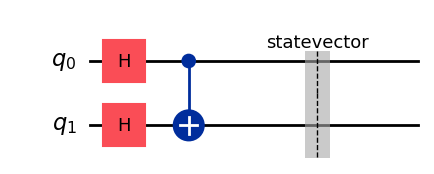

<IPython.core.display.Latex object>

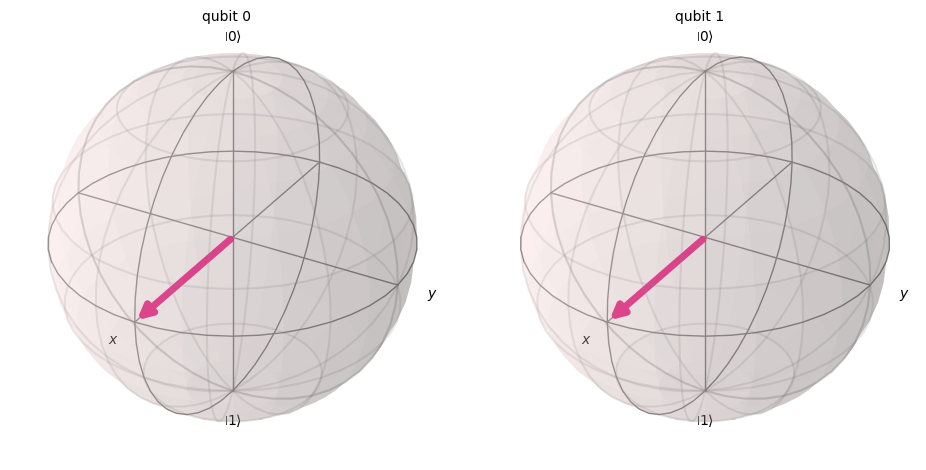


H-X-H Circuit:


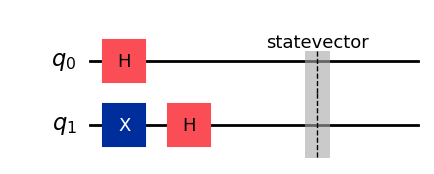

<IPython.core.display.Latex object>

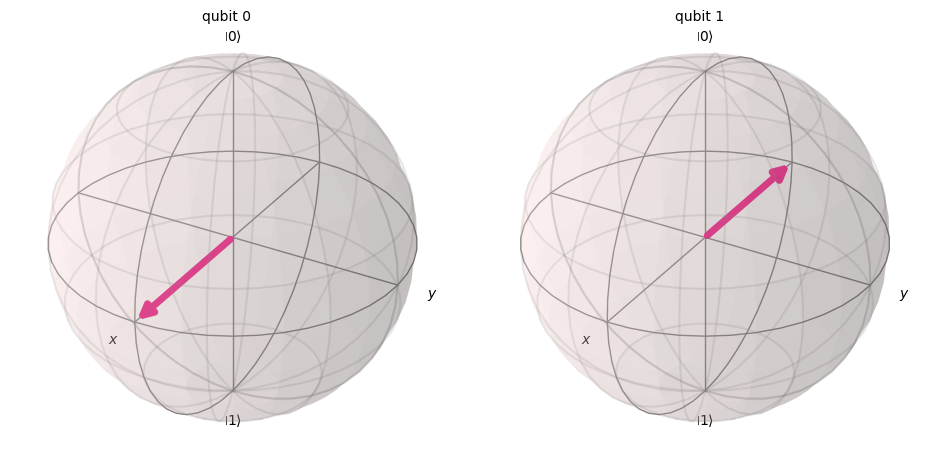


Controlled-T Circuit (Phase Kickback):


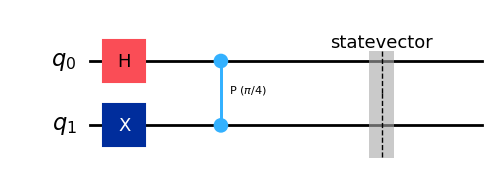

<IPython.core.display.Latex object>

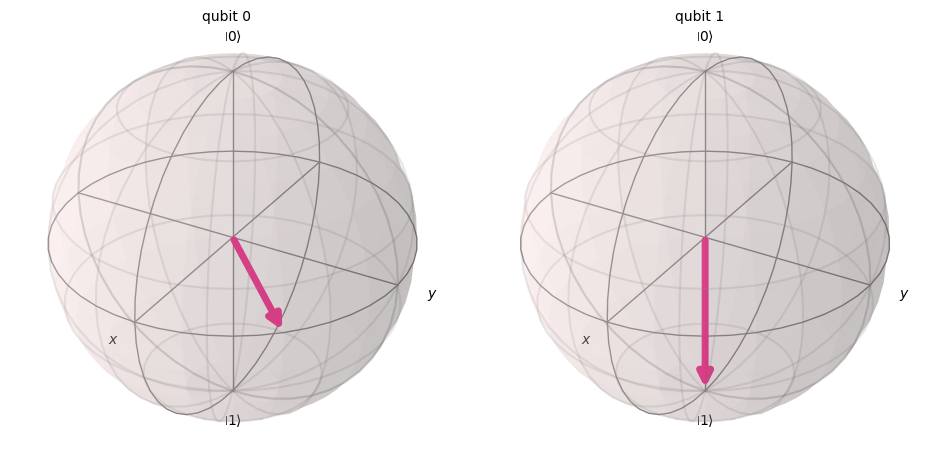


Controlled-T with -pi/2 Phase:


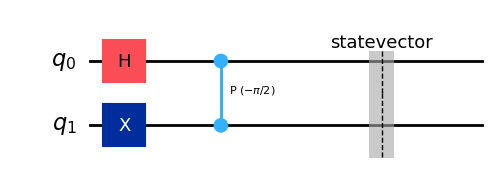

<IPython.core.display.Latex object>

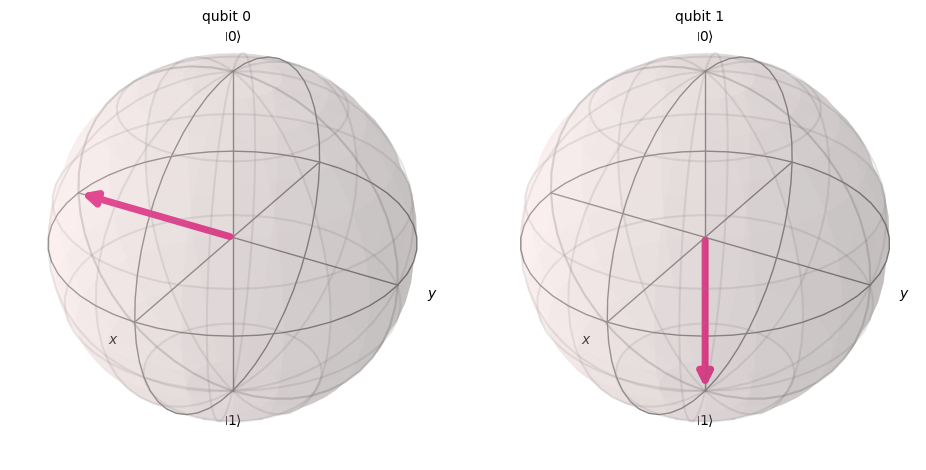


Controlled-T with |11> State:


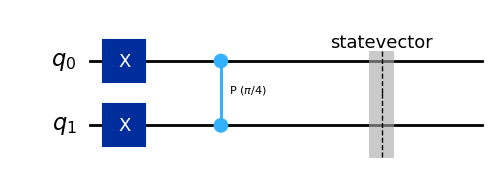

<IPython.core.display.Latex object>

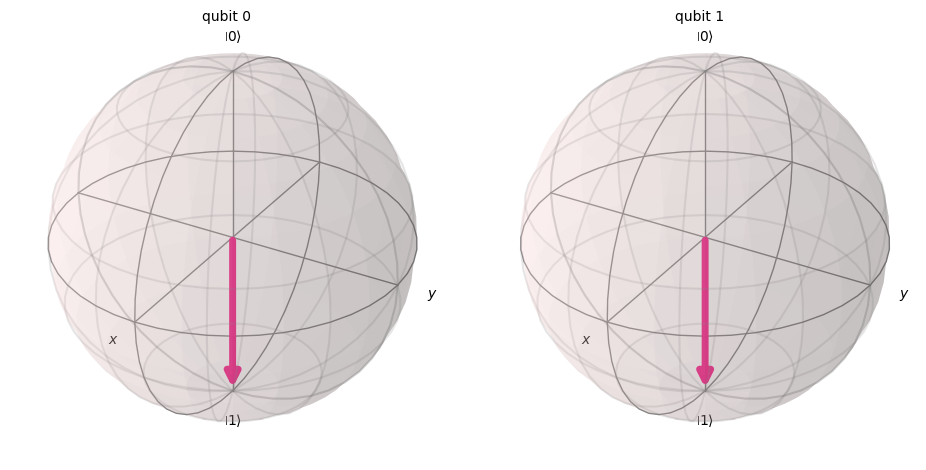


Unitary of Controlled-T:


<IPython.core.display.Latex object>

In [8]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from math import pi
from qiskit.visualization import plot_bloch_multivector, array_to_latex

# Initialize simulator
simulator = AerSimulator()

# Function to run circuit and display results
def run_and_visualize(circuit, prefix="\\text{Statevector} = "):
    circuit.save_statevector()
    result = simulator.run(circuit).result()
    statevector = result.get_statevector(circuit)
    display(circuit.draw(output='mpl'))
    display(array_to_latex(statevector, prefix=prefix))
    display(plot_bloch_multivector(statevector))

# 1. Basic CNOT circuit
qc1 = QuantumCircuit(2)
qc1.h(0)
qc1.h(1)
qc1.cx(0, 1)
print("CNOT Circuit:")
run_and_visualize(qc1)

# 2. H-X-H circuit
qc2 = QuantumCircuit(2)
qc2.h(0)
qc2.x(1)
qc2.h(1)
print("\nH-X-H Circuit:")
run_and_visualize(qc2)

# 3. Controlled-T (Phase Kickback)
qc3 = QuantumCircuit(2)
qc3.h(0)
qc3.x(1)
qc3.cp(pi/4, 0, 1)  # Controlled phase gate
print("\nControlled-T Circuit (Phase Kickback):")
run_and_visualize(qc3)

# 4. Controlled-T with different phase
qc4 = QuantumCircuit(2)
qc4.h(0)
qc4.x(1)
qc4.cp(-pi/2, 0, 1)
print("\nControlled-T with -pi/2 Phase:")
run_and_visualize(qc4)

# 5. Controlled-T with both qubits in |1>
qc5 = QuantumCircuit(2)
qc5.x(0)
qc5.x(1)
qc5.cp(pi/4, 0, 1)
print("\nControlled-T with |11> State:")
run_and_visualize(qc5)

# 6. Unitary of Controlled-T
qc6 = QuantumCircuit(2)
qc6.cp(pi/4, 0, 1)
qc6.save_unitary()
print("\nUnitary of Controlled-T:")
result = simulator.run(qc6).result()
unitary = result.get_unitary(qc6)
display(array_to_latex(unitary, prefix="\\text{Controlled-T Unitary} = "))